In [28]:
import json
import pandas as pd
import requests
import csv
import seaborn as sns

In [86]:
# We doen een "aanvraag" bij de API. Deze url werkt alleen als de rest server gestart is. 
# response = requests.get('http://localhost:8080/medish_centrum_randstad/api/netlify?page=1')

In [87]:
# Checken wat voor data/type we binnen hebben gekregen
# response.headers['content-type']

In [54]:
#Nieuwe data opgeslagen

df = pd.read_csv('../../Projects/Project1/data/data.csv')
df.head()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar
0,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9
1,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2
2,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5
3,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9
4,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5


In [55]:
#verwijder column 'id'

#df.drop('id', axis=1, inplace=True)
# df =df.drop(df.columns[0], axis = 1)

# df.head()

In [56]:
# We hebben nu een werkbaar dataframe met al onze variabelen in de kolommen, en alle individuele patienten/datapunten
# in de rijen. We kunnen deze nu evt. als een nieuwe csv file exporteren, zonder index:

df.to_csv('data_new.csv', index=False, sep=';')


In [57]:
# Als een van de eerste stappen in de IDE kunnen we kijken naar wat voor soort variabelen we hebben,
# van welk type deze variabelen zijn (categorisch of numeriek), en ook of er bijvoorbeeld waardes missen. 

# Eerst kijken we naar de datatypen van elke kolom
print(type(df))
print(df.dtypes)
print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
genetic     float64
length      float64
mass        float64
exercise    float64
smoking     float64
alcohol     float64
lifespan    float64
sugar       float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4095 non-null   float64
 1   length    4093 non-null   float64
 2   mass      4094 non-null   float64
 3   exercise  4095 non-null   float64
 4   smoking   4096 non-null   float64
 5   alcohol   4094 non-null   float64
 6   lifespan  4094 non-null   float64
 7   sugar     4095 non-null   float64
dtypes: float64(8)
memory usage: 256.1 KB
None
      genetic  length   mass  exercise  smoking  alcohol  lifespan  sugar
0        73.9   185.0   99.7       0.9      0.0      2.4      73.1    6.9
1        86.0   172.0  105.4       1.8      8.1      0.4      85.0    4.2
2        83.3   176.0  

In [58]:
#Zoek en verwijder non-numerieke waardes

for c in df.columns:
    df[c] = pd.to_numeric(df[c], errors='coerce')

print(df)

      genetic  length   mass  exercise  smoking  alcohol  lifespan  sugar
0        73.9   185.0   99.7       0.9      0.0      2.4      73.1    6.9
1        86.0   172.0  105.4       1.8      8.1      0.4      85.0    4.2
2        83.3   176.0  111.4       1.1      0.8      4.6      81.6    7.5
3        82.8   164.0  111.4       4.7     11.8      1.0      81.0    2.9
4        78.7   178.0   71.6       1.5      8.3      4.9      75.0    5.5
...       ...     ...    ...       ...      ...      ...       ...    ...
4091     80.3   176.0  115.9       3.7      0.1      5.6      80.7    5.8
4092     75.3   162.0  129.6       3.6      6.2      5.6      71.1    7.6
4093     93.1   189.0  115.3       2.7      9.4      4.9      90.0    6.6
4094     77.9   170.0   90.8       2.3     13.2      0.8      75.9    6.2
4095    101.3   188.0  129.2       1.2      8.2      6.0      96.9    6.2

[4096 rows x 8 columns]


In [59]:
#vind alle null-waardes en verwijder ze

df= df.dropna(axis=0)
print(df)

      genetic  length   mass  exercise  smoking  alcohol  lifespan  sugar
0        73.9   185.0   99.7       0.9      0.0      2.4      73.1    6.9
1        86.0   172.0  105.4       1.8      8.1      0.4      85.0    4.2
2        83.3   176.0  111.4       1.1      0.8      4.6      81.6    7.5
3        82.8   164.0  111.4       4.7     11.8      1.0      81.0    2.9
4        78.7   178.0   71.6       1.5      8.3      4.9      75.0    5.5
...       ...     ...    ...       ...      ...      ...       ...    ...
4091     80.3   176.0  115.9       3.7      0.1      5.6      80.7    5.8
4092     75.3   162.0  129.6       3.6      6.2      5.6      71.1    7.6
4093     93.1   189.0  115.3       2.7      9.4      4.9      90.0    6.6
4094     77.9   170.0   90.8       2.3     13.2      0.8      75.9    6.2
4095    101.3   188.0  129.2       1.2      8.2      6.0      96.9    6.2

[4084 rows x 8 columns]


In [60]:
df_null = df[df.isna().any(axis=1)]

df_null

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar


In [61]:
#Er zijn geen null-waardes (meer). 
#Verwijder eventuele negatieve waardes

df.drop(df[df['genetic'] < 0].index, inplace = True)
df.drop(df[df['length'] < 0].index, inplace = True)
df.drop(df[df['mass'] < 0].index, inplace = True)
df.drop(df[df['exercise'] < 0].index, inplace = True)
df.drop(df[df['smoking'] < 0].index, inplace = True)
df.drop(df[df['alcohol'] < 0].index, inplace = True)
df.drop(df[df['lifespan'] < 0].index, inplace = True)
df.drop(df[df['sugar'] < 0].index, inplace = True)

df



,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar
0,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9
1,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2
2,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5
3,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9
4,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5
...,...,...,...,...,...,...,...,...
4091,80.3,176.0,115.9,3.7,0.1,5.6,80.7,5.8
4092,75.3,162.0,129.6,3.6,6.2,5.6,71.1,7.6
4093,93.1,189.0,115.3,2.7,9.4,4.9,90.0,6.6
4094,77.9,170.0,90.8,2.3,13.2,0.8,75.9,6.2


In [62]:
#sla de opgeschoonde dataset op 
df.to_csv("Data_clean.csv")

df

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar
0,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9
1,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2
2,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5
3,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9
4,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5
...,...,...,...,...,...,...,...,...
4091,80.3,176.0,115.9,3.7,0.1,5.6,80.7,5.8
4092,75.3,162.0,129.6,3.6,6.2,5.6,71.1,7.6
4093,93.1,189.0,115.3,2.7,9.4,4.9,90.0,6.6
4094,77.9,170.0,90.8,2.3,13.2,0.8,75.9,6.2


In [63]:
print(df.nunique())

genetic     381
length       61
mass        986
exercise     55
smoking     223
alcohol      61
lifespan    411
sugar       132
dtype: int64


In [64]:
# Een volgende stap is om eens te kijken naar wat van de variabelen, hoe zit het bijvoorbeeld met de gemiddelde
# levensverwachting en suikerinname? 

df[['sugar', 'lifespan']].groupby(['sugar'], as_index=False).mean().sort_values(by='sugar', ascending=False)

,sugar,lifespan
131,13.8,77.985714
130,13.7,74.950000
129,13.6,77.575000
128,13.5,79.533333
127,13.4,82.733333
...,...,...
4,1.1,79.157143
3,1.0,80.920000
2,0.9,85.357143
1,0.8,80.030000


In [143]:
# Hier zien we een duidelijke afname in levensverwachting naarmate 'sugar' een hogere waarde aanneemt. 
# Hetzelfde kunnen we doen voor 'exercise'

df[['exercise', 'lifespan']].groupby(['exercise'], as_index=False).mean().sort_values(by='lifespan', ascending=False)

,exercise,lifespan
46,4.7,84.000000
51,5.2,83.114286
42,4.3,83.072549
40,4.1,82.678049
54,5.5,82.600000
50,5.1,82.525000
49,5.0,82.441176
44,4.5,82.374510
47,4.8,82.160000
2,0.3,82.088235


In [ ]:
# Wat niet zozeer interessant is voor ons toekomstige model, maar wel interessant: hoe is het gesteld met het bewegen
# in deze dataset; 

#df['exercise'].value_counts()

           genetic    length      mass  exercise   smoking   alcohol  \
genetic   1.000000 -0.029606  0.000513 -0.035005 -0.015490 -0.013170   
length   -0.029606  1.000000  0.000106  0.011401 -0.020691 -0.007162   
mass      0.000513  0.000106  1.000000  0.008204 -0.009541  0.000726   
exercise -0.035005  0.011401  0.008204  1.000000  0.021512 -0.024521   
smoking  -0.015490 -0.020691 -0.009541  0.021512  1.000000 -0.012298   
alcohol  -0.013170 -0.007162  0.000726 -0.024521 -0.012298  1.000000   
lifespan  0.949799  0.013155 -0.066040  0.082986 -0.246140 -0.063539   
sugar     0.018785  0.007860  0.005601 -0.008328  0.008925  0.003860   

          lifespan     sugar  
genetic   0.949799  0.018785  
length    0.013155  0.007860  
mass     -0.066040  0.005601  
exercise  0.082986 -0.008328  
smoking  -0.246140  0.008925  
alcohol  -0.063539  0.003860  
lifespan  1.000000 -0.010887  
sugar    -0.010887  1.000000  


<AxesSubplot: >

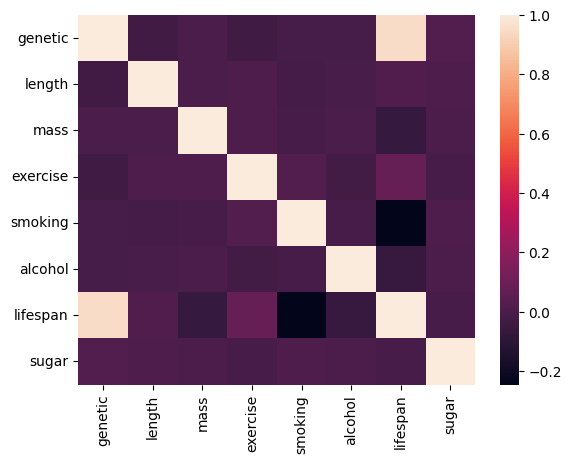

In [43]:
#We kunnen nu kijken naar eventuele onderlinge correlaties:
print(df.corr())
sns.heatmap(df.corr())

In [145]:
df.corr()['lifespan']

genetic     0.949799
length      0.013155
mass       -0.066040
exercise    0.082986
smoking    -0.246140
alcohol    -0.063539
lifespan    1.000000
sugar      -0.010887
Name: lifespan, dtype: float64

<AxesSubplot: xlabel='genetic'>

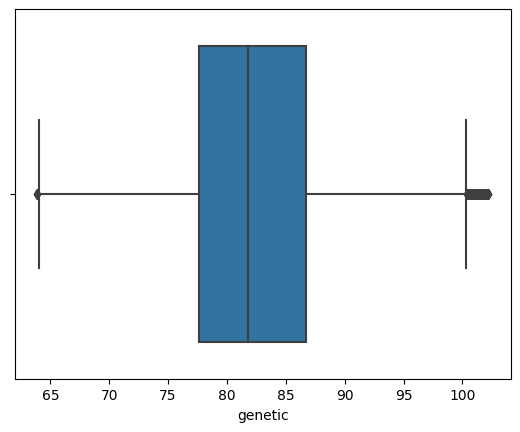

In [146]:
#controleer op outliers met boxplots

sns.boxplot(x=df['genetic'])

#Alleen bij 'genetic' en 'lifespan' zijn er outliers boven de 100 jaar


In [65]:
#voeg column BMI toe
df = pd.read_csv('../../Projects/Project1/data/data.csv')
df["BMI"] = (df.mass/(df.length/100)**2)

df

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,BMI
0,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9,29.130752
1,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2,35.627366
2,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5,35.963326
3,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9,41.418798
4,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5,22.598157
...,...,...,...,...,...,...,...,...,...
4091,80.3,176.0,115.9,3.7,0.1,5.6,80.7,5.8,37.416064
4092,75.3,162.0,129.6,3.6,6.2,5.6,71.1,7.6,49.382716
4093,93.1,189.0,115.3,2.7,9.4,4.9,90.0,6.6,32.277932
4094,77.9,170.0,90.8,2.3,13.2,0.8,75.9,6.2,31.418685


In [67]:
#drop columns mass en length

df_bmi = df.drop(['length', 'mass'], axis=1)
df_bmi

,genetic,exercise,smoking,alcohol,lifespan,sugar,BMI
0,73.9,0.9,0.0,2.4,73.1,6.9,29.130752
1,86.0,1.8,8.1,0.4,85.0,4.2,35.627366
2,83.3,1.1,0.8,4.6,81.6,7.5,35.963326
3,82.8,4.7,11.8,1.0,81.0,2.9,41.418798
4,78.7,1.5,8.3,4.9,75.0,5.5,22.598157
...,...,...,...,...,...,...,...
4091,80.3,3.7,0.1,5.6,80.7,5.8,37.416064
4092,75.3,3.6,6.2,5.6,71.1,7.6,49.382716
4093,93.1,2.7,9.4,4.9,90.0,6.6,32.277932
4094,77.9,2.3,13.2,0.8,75.9,6.2,31.418685


In [91]:
df_lifestyle = df[['exercise', 'smoking', 'alcohol', 'sugar', 'lifespan', 'BMI']]

df_not_genetic = df.drop(['genetic'], axis = 1)
df_ng = df_not_genetic

In [97]:
#round BMI value off to 1 decimal. 

df_bmi['BMI'] = df['BMI'].apply(lambda x: round(x, 1)) 


In [101]:
df.to_csv("data/DataBMI.csv")

In [103]:
# df met BMI, maar zonder mass+length

df_bmi = df.drop(['length', 'mass'], axis=1)

df_bmi

,genetic,exercise,smoking,alcohol,lifespan,sugar,BMI
0,73.9,0.9,0.0,2.4,73.1,6.9,29.1
1,86.0,1.8,8.1,0.4,85.0,4.2,35.6
2,83.3,1.1,0.8,4.6,81.6,7.5,36.0
3,82.8,4.7,11.8,1.0,81.0,2.9,41.4
4,78.7,1.5,8.3,4.9,75.0,5.5,22.6
...,...,...,...,...,...,...,...
4091,80.3,3.7,0.1,5.6,80.7,5.8,37.4
4092,75.3,3.6,6.2,5.6,71.1,7.6,49.4
4093,93.1,2.7,9.4,4.9,90.0,6.6,32.3
4094,77.9,2.3,13.2,0.8,75.9,6.2,31.4


In [105]:
df_bmi.to_csv("data/DataBMI2.csv")